**In this section, at first, we reduced the 90% of data in two classes. (Cats and dogs) then, we train the network with this new dataset. Secondly, we increase the dataset with help of data augmentation, especially cats and dogs classes and the network was trained by this dataset.**

# **Setup**

In [1]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [2]:
import tensorflow as tf
print(tf.__version__)

1.15.2


In [3]:
import time
import matplotlib
from matplotlib import pyplot as plt
# import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# MLP
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from imblearn.over_sampling import SMOTE

from keras.constraints import maxnorm
from keras.optimizers import SGD, Adam

# Both
from keras.layers import Activation
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator

# CNN

from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import BatchNormalization
                        

from keras import backend as K
#import tensorflow.keras.backend as K
#import tensorflow as tf

# Data
from keras.datasets import cifar10

Using TensorFlow backend.


# **Some Functions**

In [4]:
labels=['airplane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [5]:
# Make sure TensorFlow running on GPU

# from tensorflow.python.client import device_lib
# print(device_lib.list_local_devices())
K.tensorflow_backend._get_available_gpus()
#tf.config.list_physical_devices('GPU') 

['/job:localhost/replica:0/task:0/device:GPU:0']

In [6]:
sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))

Device mapping:
/job:localhost/replica:0/task:0/device:XLA_CPU:0 -> device: XLA_CPU device
/job:localhost/replica:0/task:0/device:XLA_GPU:0 -> device: XLA_GPU device
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7



In [7]:
def plothist(hist):
    plt.plot(hist.history['accuracy'],color='b',linewidth=2.0)
    plt.plot(hist.history['val_accuracy'],color='r',linewidth=2.0)

    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.grid()
    plt.show()

def plothist_loss(hist):
    plt.plot(hist.history['loss'],color='b',linewidth=2.0)
    plt.plot(hist.history['val_loss'],color='r',linewidth=2.0)
  
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.grid()
    plt.show()
def Hot_to_num(x):
  y=[]
  for i in range(0,x.shape[0]):
    y.append(np.where(x[i]==1)[0][0])
  return np.array(y)

# **CNN// The Best Model**


**Parameters and Hyper-Parameters**
* 	Batch Size: 64
* 	Epochs: 100
*   Padding: Same
* 	Kernel: 3*3
* 	Convolution + ReLU
* 	Pooling:Maxpooling,Pool size=2*2 
*   BatchNormalization:Before Activation Function
* 	Loss Function: Categorical_Crossentropy
* 	Optimizer: ADAM
* 	Dropout: 0.25,0.25,0.5












Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_13 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 30, 30, 32)        9248      
_________________________________________________________________
batch_normalization_9 (Batch (None, 30, 30, 32)        128       
_________________________________________________________________
activation_14 (Activation)   (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
batch_normalization_10 (Batc (None, 28, 28, 32)       

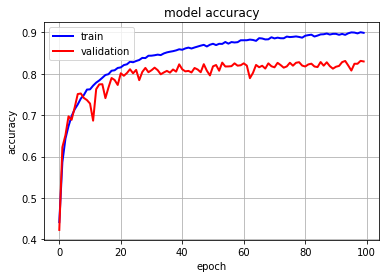

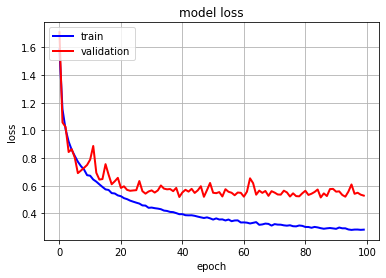

Evaluation with Test Set:
Test loss: 0.5746296861171722
Test acc: 0.8162999749183655


In [ ]:
# Retrieving Data
(CNN_x_train, CNN_y_train), (CNN_x_test, CNN_y_test) = cifar10.load_data()

# Declare variables

CNN_nb_epoch = 100
CNN_batch_size = 64
nb_classes = 10

# Convert and pre-processing

CNN_y_train = np_utils.to_categorical(CNN_y_train, nb_classes)
CNN_y_test = np_utils.to_categorical(CNN_y_test, nb_classes)

CNN_x_train = CNN_x_train.astype('float32')
CNN_x_test = CNN_x_test.astype('float32')

CNN_x_train  /= 255
CNN_x_test /= 255

def base_model():

    CNN_model = Sequential()
    CNN_model.add(Conv2D(32, (3, 3), padding='same', input_shape=CNN_x_train.shape[1:]))
    CNN_model.add(Activation('relu'))
    
    CNN_model.add(Conv2D(32,(3, 3)))
    CNN_model.add(BatchNormalization())
    CNN_model.add(Activation('relu')) 
    CNN_model.add(Conv2D(32,(3, 3)))
    CNN_model.add(BatchNormalization())
    CNN_model.add(Activation('relu'))
    CNN_model.add(MaxPooling2D(pool_size=(2, 2)))
    CNN_model.add(Dropout(0.25))
    
    CNN_model.add(Conv2D(32,(3, 3)))
    CNN_model.add(BatchNormalization())
    CNN_model.add(Activation('relu')) 
    CNN_model.add(MaxPooling2D(pool_size=(2, 2)))
    CNN_model.add(Dropout(0.25))

    CNN_model.add(Flatten())
    
    CNN_model.add(Dense(512))
    CNN_model.add(BatchNormalization())
    CNN_model.add(Activation('relu'))
    CNN_model.add(Dropout(0.5))
    
    CNN_model.add(Dense(nb_classes))
    CNN_model.add(Activation('softmax'))

    CNN_opt_sgd = SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=False)
    CNN_opt_adam = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
    
    
    CNN_model.compile(loss='categorical_crossentropy', 
                      optimizer='adam',
                      metrics=['accuracy'])
    return CNN_model

cnn_n = base_model()
cnn_n.summary()

# Fit model
print('Training.....')
CNN_history = cnn_n.fit(CNN_x_train, CNN_y_train,
                batch_size=CNN_batch_size, 
                epochs=CNN_nb_epoch, 
                validation_split = 0.1, # validation_data=(CNN_x_test,CNN_y_test),
                shuffle=True)

print('Training Outcome:')
plothist(CNN_history)
plothist_loss(CNN_history)

print('Evaluation with Test Set:')
loss, acc = cnn_n.evaluate(CNN_x_test, CNN_y_test, verbose=0)
print('Test loss:', loss)
print('Test acc:', acc)

In [ ]:
predictions=(cnn_n.predict(CNN_x_test)).tolist()

y_pred_1hot=np.array([np.eye(10)[int(i.index(max(i)))]  for i in predictions])
y_predicted=Hot_to_num(y_pred_1hot)
y_test=Hot_to_num(CNN_y_test)


### **Confusion Matrix and Error**

Text(0.5, 1.0, 'Refined Confusion Matrix')

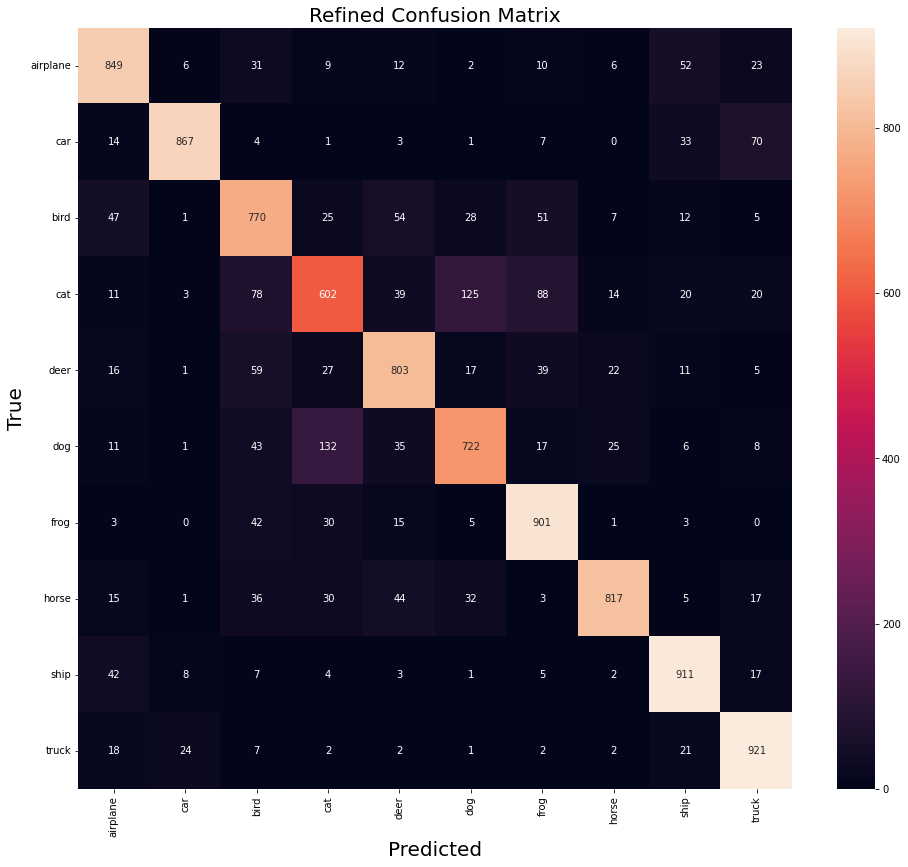

In [ ]:
cm=confusion_matrix(y_test, y_predicted)
# Plot confusion matrix in a beautiful manner
fig = plt.figure(figsize=(16, 14))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt = 'g'); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted', fontsize=20)
ax.xaxis.set_label_position('bottom')
plt.xticks(rotation=90)
ax.xaxis.set_ticklabels(labels, fontsize = 10)
ax.xaxis.tick_bottom()

ax.set_ylabel('True', fontsize=20)
ax.yaxis.set_ticklabels(labels, fontsize = 10)
plt.yticks(rotation=0)

plt.title('Refined Confusion Matrix', fontsize=20)

In [ ]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84      1000
           1       0.95      0.87      0.91      1000
           2       0.71      0.77      0.74      1000
           3       0.70      0.60      0.65      1000
           4       0.80      0.80      0.80      1000
           5       0.77      0.72      0.75      1000
           6       0.80      0.90      0.85      1000
           7       0.91      0.82      0.86      1000
           8       0.85      0.91      0.88      1000
           9       0.85      0.92      0.88      1000

    accuracy                           0.82     10000
   macro avg       0.82      0.82      0.82     10000
weighted avg       0.82      0.82      0.82     10000



# **CNN// Imbalanced Dataset**


**Parameters and Hyper-Parameters**
* 	Batch Size: 64
* 	Epochs: 100
*   Padding: Same
* 	Kernel: 3*3
* 	Convolution + ReLU
* 	Pooling:Maxpooling,Pool size=2*2 
*   BatchNormalization:Before Activation Function
* 	Loss Function: Categorical_Crossentropy
* 	Optimizer: ADAM
* 	Dropout: 0.25,0.25,0.5












In [ ]:
# Retrieving Data
(CNN_x_train, CNN_y_train), (CNN_x_test, CNN_y_test) = cifar10.load_data()

# Declare variables

CNN_nb_epoch = 100
CNN_batch_size = 64
nb_classes = 10

# Removing half of data in airplan and bird classes
labels=['airplane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
removed_sample_cat=[]
removed_sample_dog=[]
for sample in range(0,len(CNN_y_train)):
  if CNN_y_train[sample][0]==3:# cat
    removed_sample_cat.append(sample)
  if CNN_y_train[sample][0]==5:# dog
    removed_sample_dog.append(sample)


# Choosing random sample for removing
def search(list, platform):
    for i in range(len(list)):
        if list[i] == platform:
            return True
    return False
Index_Removed_List=[]
while len(Index_Removed_List)!= 4500:
  random=np.random.uniform(0,5000,1).astype(int)
  if search(Index_Removed_List,random)== False:
    Index_Removed_List.append(random)

# Index_Removed_List_cat =np.random.uniform(0,len(removed_sample_cat),int(len(removed_sample_cat)*0.9)).astype(int)
# Index_Removed_List_dog =np.random.uniform(0,len(removed_sample_dog),int(len(removed_sample_dog)*0.9)).astype(int)
print(len(Index_Removed_List))

r_cat =[]
r_dog =[]
for i in Index_Removed_List:
  r_cat.append(removed_sample_cat[i[0]])
  r_dog.append(removed_sample_dog[i[0]])

r= r_dog+r_cat

CNN_x_train=np.delete(CNN_x_train,(r),axis=0)
CNN_y_train=np.delete(CNN_y_train,(r),axis=0)

4500


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_7 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
batch_normalization_5 (Batch (None, 30, 30, 32)        128       
_________________________________________________________________
activation_8 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
batch_normalization_6 (Batch (None, 28, 28, 32)       

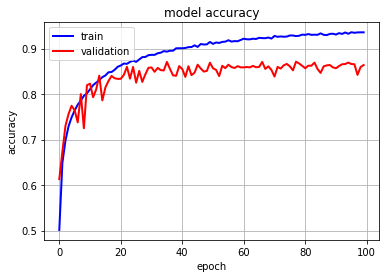

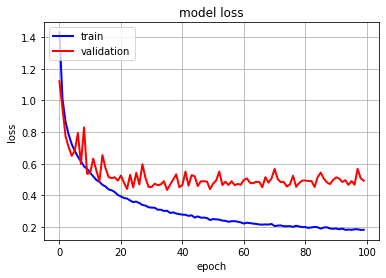

Evaluation with Test Set:
Test loss: 0.9205623014450073
Test acc: 0.7530999779701233


In [ ]:


# Convert and pre-processing

CNN_y_train= np_utils.to_categorical(CNN_y_train, nb_classes)
CNN_y_test = np_utils.to_categorical(CNN_y_test, nb_classes)

CNN_x_train = CNN_x_train.astype('float32')
CNN_x_test = CNN_x_test.astype('float32')

CNN_x_train  /= 255
CNN_x_test /= 255

def base_model():

    CNN_model = Sequential()
    CNN_model.add(Conv2D(32, (3, 3), padding='same', input_shape=CNN_x_train.shape[1:]))
    CNN_model.add(Activation('relu'))
    
    CNN_model.add(Conv2D(32,(3, 3)))
    CNN_model.add(BatchNormalization())
    CNN_model.add(Activation('relu')) 
    CNN_model.add(Conv2D(32,(3, 3)))
    CNN_model.add(BatchNormalization())
    CNN_model.add(Activation('relu'))
    CNN_model.add(MaxPooling2D(pool_size=(2, 2)))
    CNN_model.add(Dropout(0.25))
    
    CNN_model.add(Conv2D(32,(3, 3)))
    CNN_model.add(BatchNormalization())
    CNN_model.add(Activation('relu')) 
    CNN_model.add(MaxPooling2D(pool_size=(2, 2)))
    CNN_model.add(Dropout(0.25))

    CNN_model.add(Flatten())
    
    CNN_model.add(Dense(512))
    CNN_model.add(BatchNormalization())
    CNN_model.add(Activation('relu'))
    CNN_model.add(Dropout(0.5))
    
    CNN_model.add(Dense(nb_classes))
    CNN_model.add(Activation('softmax'))

    CNN_opt_sgd = SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=False)
    CNN_opt_adam = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
    
    
    CNN_model.compile(loss='categorical_crossentropy', 
                      optimizer='adam',
                      metrics=['accuracy'])
    return CNN_model

cnn_n = base_model()
cnn_n.summary()

# Fit model
print('Training.....')
CNN_history = cnn_n.fit(CNN_x_train, CNN_y_train,
                batch_size=CNN_batch_size, 
                epochs=CNN_nb_epoch, 
                validation_split = 0.1, # validation_data=(CNN_x_test,CNN_y_test),
                shuffle=True)

print('Training Outcome:')
plothist(CNN_history)
plothist_loss(CNN_history)

print('Evaluation with Test Set:')
loss, acc = cnn_n.evaluate(CNN_x_test, CNN_y_test, verbose=0)
print('Test loss:', loss)
print('Test acc:', acc)

In [ ]:
predictions=(cnn_n.predict(CNN_x_test)).tolist()

y_pred_1hot=np.array([np.eye(10)[int(i.index(max(i)))]  for i in predictions])
y_predicted=Hot_to_num(y_pred_1hot)
y_test=Hot_to_num(CNN_y_test)


### **Confusion Matrix and Error**

Text(0.5, 1.0, 'Refined Confusion Matrix')

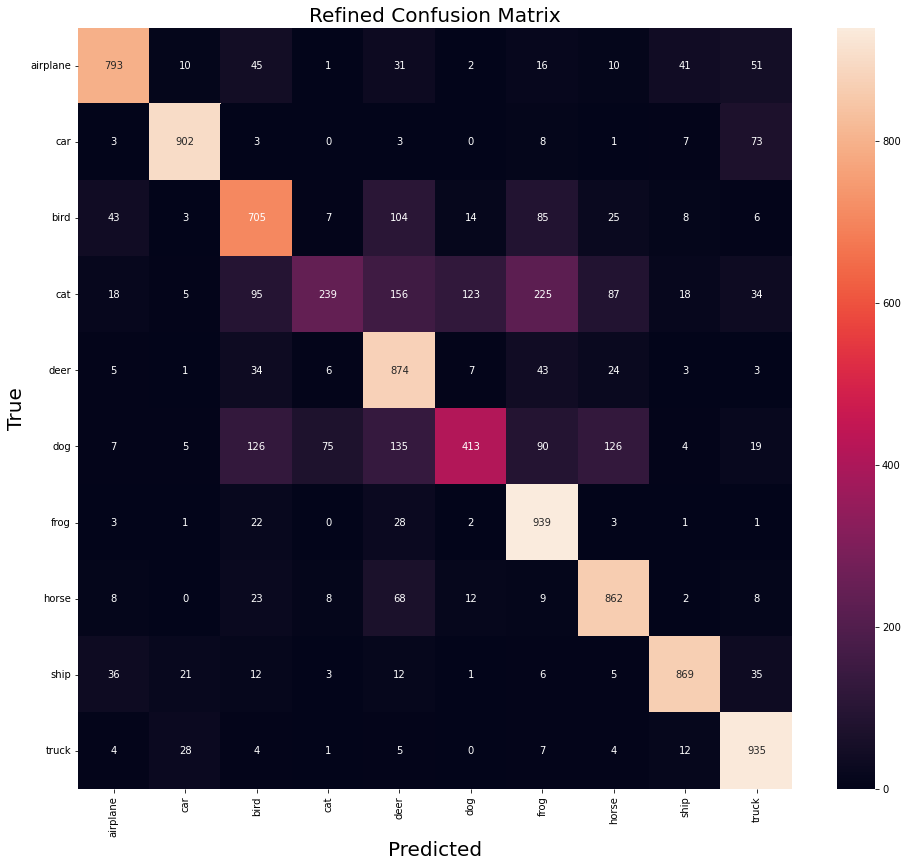

In [ ]:
cm=confusion_matrix(y_test, y_predicted)
# Plot confusion matrix in a beautiful manner
fig = plt.figure(figsize=(16, 14))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt = 'g'); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted', fontsize=20)
ax.xaxis.set_label_position('bottom')
plt.xticks(rotation=90)
ax.xaxis.set_ticklabels(labels, fontsize = 10)
ax.xaxis.tick_bottom()

ax.set_ylabel('True', fontsize=20)
ax.yaxis.set_ticklabels(labels, fontsize = 10)
plt.yticks(rotation=0)

plt.title('Refined Confusion Matrix', fontsize=20)

In [ ]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.86      0.79      0.83      1000
           1       0.92      0.90      0.91      1000
           2       0.66      0.70      0.68      1000
           3       0.70      0.24      0.36      1000
           4       0.62      0.87      0.72      1000
           5       0.72      0.41      0.52      1000
           6       0.66      0.94      0.77      1000
           7       0.75      0.86      0.80      1000
           8       0.90      0.87      0.88      1000
           9       0.80      0.94      0.86      1000

    accuracy                           0.75     10000
   macro avg       0.76      0.75      0.74     10000
weighted avg       0.76      0.75      0.74     10000



# **CNN//Improved version with data augmentation**


**Parameters and Hyper-Parameters**
* 	Batch Size: 64
* 	Epochs: 100
*   Padding: Same
* 	Kernel: 3*3
* 	Convolution + ReLU
* 	Pooling:Maxpooling,Pool size=2*2 
*   BatchNormalization:Before Activation Function
* 	Loss Function: Categorical_Crossentropy
* 	Optimizer: ADAM
* 	Dropout: 0.25,0.25,0.5












Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
activation_25 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 30, 30, 32)        9248      
_________________________________________________________________
batch_normalization_17 (Batc (None, 30, 30, 32)        128       
_________________________________________________________________
activation_26 (Activation)   (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
batch_normalization_18 (Batc (None, 28, 28, 32)       

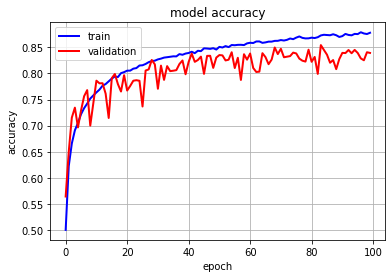

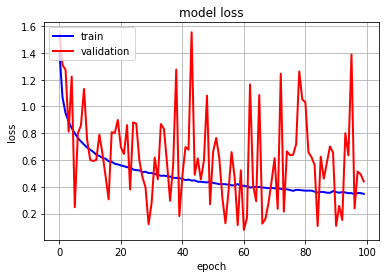

Evaluation with Test Set:
Test loss: 0.5887438404560089
Test acc: 0.8246999979019165


In [ ]:
# Retrieving Data
(CNN_x_train, CNN_y_train), (CNN_x_test, CNN_y_test) = cifar10.load_data()

# Declare variables

CNN_nb_epoch = 100
CNN_batch_size = 64
nb_classes = 10

train_datagen = ImageDataGenerator(
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        rotation_range = 10,
        horizontal_flip=True)   # flip images horizontally

validation_datagen = ImageDataGenerator()

# Convert and pre-processing

CNN_y_train = np_utils.to_categorical(CNN_y_train, nb_classes)
CNN_y_test = np_utils.to_categorical(CNN_y_test, nb_classes)

CNN_x_train = CNN_x_train.astype('float32')
CNN_x_test = CNN_x_test.astype('float32')

CNN_x_train  /= 255
CNN_x_test /= 255

train_generator = train_datagen.flow(CNN_x_train[:40000], CNN_y_train[:40000], batch_size=32)
validation_generator = validation_datagen.flow(CNN_x_train[40000:], CNN_y_train[40000:], batch_size=32)

def base_model():

    CNN_model = Sequential()
    CNN_model.add(Conv2D(32, (3, 3), padding='same', input_shape=CNN_x_train.shape[1:]))
    CNN_model.add(Activation('relu'))
    
    CNN_model.add(Conv2D(32,(3, 3)))
    CNN_model.add(BatchNormalization())
    CNN_model.add(Activation('relu')) 
    CNN_model.add(Conv2D(32,(3, 3)))
    CNN_model.add(BatchNormalization())
    CNN_model.add(Activation('relu'))
    CNN_model.add(MaxPooling2D(pool_size=(2, 2)))
#     CNN_model.add(Dropout(0.25))
    
    CNN_model.add(Conv2D(32,(3, 3)))
    CNN_model.add(BatchNormalization())
    CNN_model.add(Activation('relu')) 
    CNN_model.add(MaxPooling2D(pool_size=(2, 2)))
#     CNN_model.add(Dropout(0.25))

    CNN_model.add(Flatten())
    
    CNN_model.add(Dense(512))
    CNN_model.add(BatchNormalization())
    CNN_model.add(Activation('relu'))
    CNN_model.add(Dropout(0.2))
    
    CNN_model.add(Dense(nb_classes))
    CNN_model.add(Activation('softmax'))

    CNN_opt_sgd = SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=False)
    CNN_opt_sgd_mom = SGD(lr=0.01, momentum=0.9, decay=0.0, nesterov=False)
    CNN_opt_adam = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
   
    
    CNN_model.compile(loss='categorical_crossentropy', 
                      optimizer='adam',
                      metrics=['accuracy'])
    return CNN_model

cnn_n = base_model()
cnn_n.summary()

# Fit model
print('Training.....')
# CNN_history = cnn_n.fit(CNN_x_train, CNN_y_train,
#                 batch_size=CNN_batch_size, 
#                 epochs=CNN_nb_epoch, 
#                 validation_split = 0.2, # validation_data=(CNN_x_test,CNN_y_test),
#                 shuffle=True)

CNN_history = cnn_n.fit_generator(train_generator,
                                  validation_data=validation_generator,
                                  validation_steps=len(CNN_x_train[40000:]) / 32,
                                  steps_per_epoch=len(CNN_x_train[:40000]) / 32,
                                  epochs=CNN_nb_epoch,
                                  shuffle=True)
#                                   verbose=2)

print('Training Outcome:')
plothist(CNN_history)
plothist_loss(CNN_history)

print('Evaluation with Test Set:')
loss, acc = cnn_n.evaluate(CNN_x_test, CNN_y_test, verbose=0)
print('Test loss:', loss)
print('Test acc:', acc)

In [ ]:
predictions=(cnn_n.predict(CNN_x_test)).tolist()

y_pred_1hot=np.array([np.eye(10)[int(i.index(max(i)))]  for i in predictions])
y_predicted=Hot_to_num(y_pred_1hot)
y_test=Hot_to_num(CNN_y_test)


### **Confusion Matrix and Error**

Text(0.5, 1.0, 'Refined Confusion Matrix')

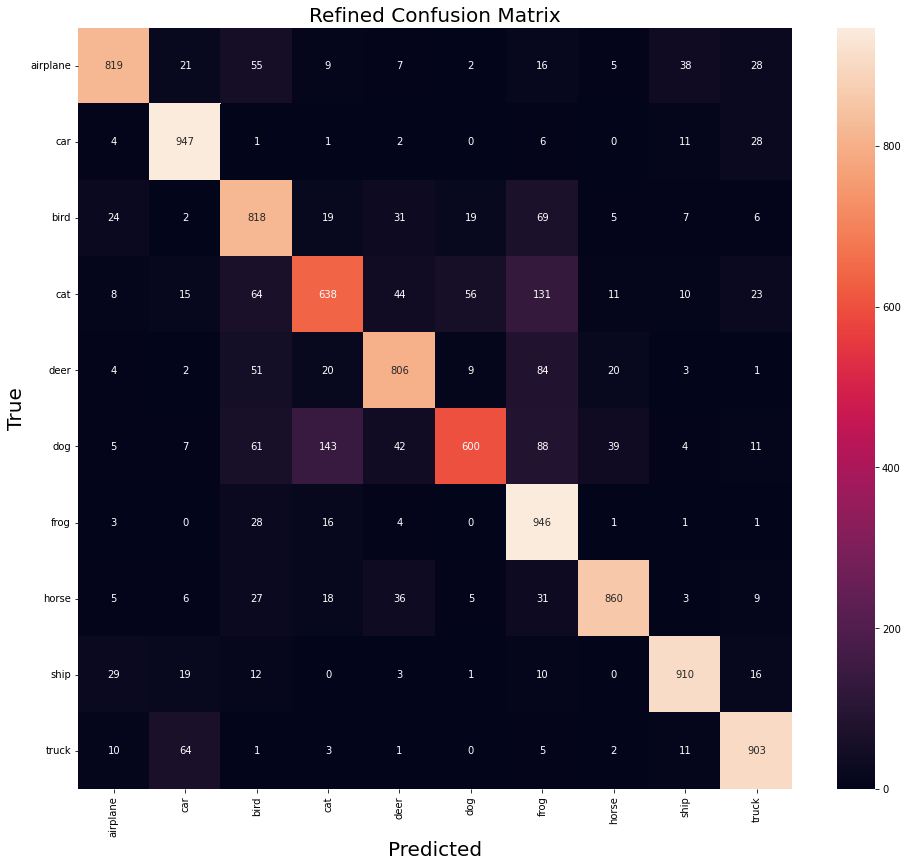

In [ ]:
cm=confusion_matrix(y_test, y_predicted)
# Plot confusion matrix in a beautiful manner
fig = plt.figure(figsize=(16, 14))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt = 'g'); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted', fontsize=20)
ax.xaxis.set_label_position('bottom')
plt.xticks(rotation=90)
ax.xaxis.set_ticklabels(labels, fontsize = 10)
ax.xaxis.tick_bottom()

ax.set_ylabel('True', fontsize=20)
ax.yaxis.set_ticklabels(labels, fontsize = 10)
plt.yticks(rotation=0)

plt.title('Refined Confusion Matrix', fontsize=20)

In [ ]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.90      0.82      0.86      1000
           1       0.87      0.95      0.91      1000
           2       0.73      0.82      0.77      1000
           3       0.74      0.64      0.68      1000
           4       0.83      0.81      0.82      1000
           5       0.87      0.60      0.71      1000
           6       0.68      0.95      0.79      1000
           7       0.91      0.86      0.89      1000
           8       0.91      0.91      0.91      1000
           9       0.88      0.90      0.89      1000

    accuracy                           0.82     10000
   macro avg       0.83      0.82      0.82     10000
weighted avg       0.83      0.82      0.82     10000

